Research question: People with autism tend to demonstrate higher levels of alexithymia (inability to identify one's own emotion). Theories state that it may be that people with austism also tend to have alexithymia, not necessarily that alexithymia is a symptom of autism. There are many scales to measure both autism and alexithymia separately. If a person scores high for having autism will their score for alexityhmia also be high?
Hypothesis: Scores on the Social Responsiveness Scale (SRS-2) will be positively correlated with scores from the Toronto Alexithymia Scale (TAS-20).

For my analysis, I plan on running a Pearson's correlation to determine if there is a relationship between the scores of the SRS-2 and the TAS-20. 

My program will read in the tsv file that contains the scores for each participant for both scales. The program will then run a Pearson's r correlation to examine the relationship between alexithymia and autism. In addition, the program will provide a graph to demonstrate the results and show whether there is a strong, positive or strong negative correlation between the two scores. If the correlation coefficient is above .70, it is expected that there is a strong correlation. The program will also provide a p value and confidence interval. 

In [42]:
#I am separating the blocks to indicate this is all this piece of code is doing. 
#This is importing the pandas directories.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


In [9]:
#New block to read in the file
scores_csv = 'Dataset_TAS_SRS.csv'


df = pd.read_csv(scores_csv)

#This displays a couple rows to make sure it is seeing the file properly. 
df.head(3)


,ID,Gender,Age,TAS-20,SRS
0,1,2,14,43,51
1,2,2,11,44,60
2,3,2,16,60,75


In [10]:
#This is showing correlations for specific columns
#df[['TAS-20', 'SRS']].corr('pearson')

#This is showing correlations for all data 
df.corr('pearson')

,ID,Gender,Age,TAS-20,SRS
ID,1.000000,-0.002548,-0.011183,-0.004586,-0.020604
Gender,-0.002548,1.000000,-0.026359,0.131823,-0.044623
Age,-0.011183,-0.026359,1.000000,0.023686,-0.007582
TAS-20,-0.004586,0.131823,0.023686,1.000000,0.707105
SRS,-0.020604,-0.044623,-0.007582,0.707105,1.000000


This will be my scatterplot for correlation between SRS and TAS-20.

<AxesSubplot:xlabel='TAS-20', ylabel='SRS'>

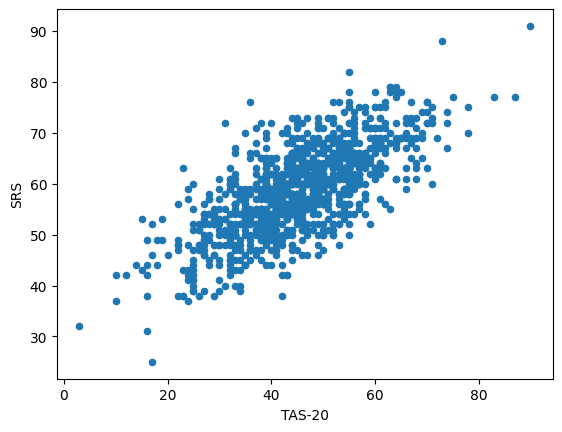

In [11]:
df.plot.scatter(x='TAS-20',
                y='SRS')

Coefficient of correlation - confirming my df.corr and that my code is working

In [12]:
from scipy import stats
stats.pearsonr(df['TAS-20'], df['SRS'])

(0.7071053908228715, 2.1839013934286993e-152)

Correlation for age and TAS

In [13]:
from scipy import stats
stats.pearsonr(df['Age'], df['TAS-20'])

(0.02368572450326514, 0.45435368230178835)

In [23]:
x=df['TAS-20']
y=df['SRS']

In [52]:
slope, intercept, r, p, stderr = stats.linregress(x, y)
line = f'Fit Line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line
print(f'The p-value is {p}.')

The p-value is 2.183901393428173e-152.


In [59]:
#https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/
#I used this site to calculate the confidence interval for my correlation. 
#I also cross checked these values in SPSS to make sure I am returning the value that I was aiming for. 

dof = len(x)-3
m = r 
r_z = np.arctanh(r)
se = 1/np.sqrt(dof)
z = stats.norm.ppf(1-.05/2)
lo_z, hi_z = r_z-z*se, r_z+z*se
lo, hi = np.tanh((lo_z, hi_z))

(lo, hi)
print(f'The confidence interval is 95% CI [{lo}, {hi}].')


The confidence interval is 95% CI [0.674687676332844, 0.7368003560695193].


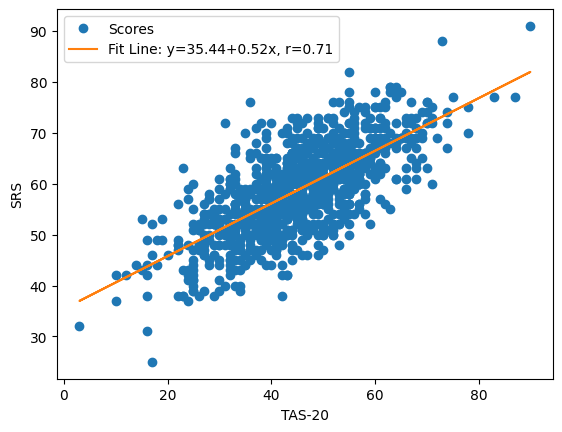

In [34]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='o', label='Scores')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('TAS-20')
ax.set_ylabel('SRS')
ax.legend(facecolor='white')
plt.show()

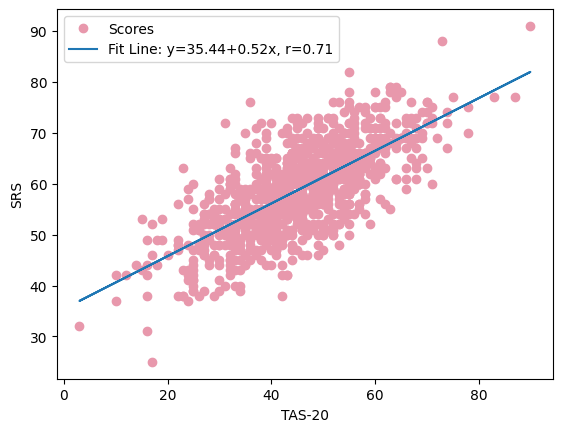

In [72]:
#changed the colors to match my powerpoint

fig, ax = plt.subplots()
color = ['#002845', '#e898ac', '#00cfcc', '#ff9973']
ax.plot(x, y, color = '#e898ac', linewidth=0, marker='o', label='Scores')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('TAS-20')
ax.set_ylabel('SRS')
ax.set
ax.legend(facecolor='white')
plt.show()